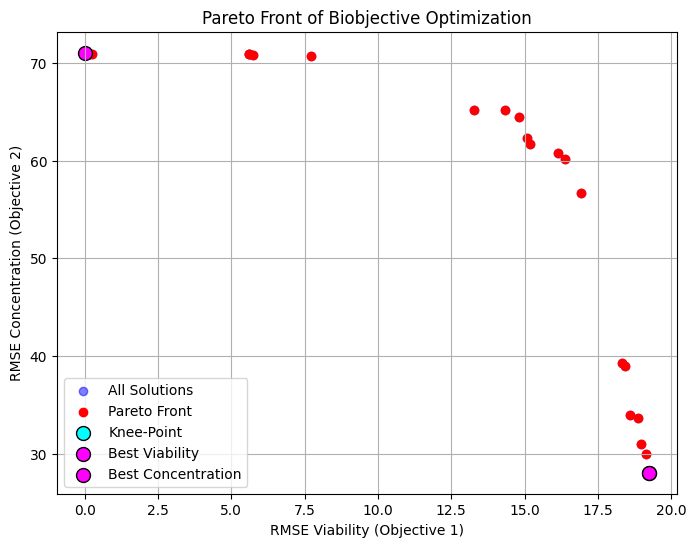

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Load the objective values
objective_values = np.loadtxt('../data_output/Calibration/Objective_values.csv', delimiter=",")

# Extract objectives
obj1 = objective_values[:, 0]  # RMSE Viability
obj2 = objective_values[:, 1]  # RMSE Concentration

# Identify Pareto front
nds = NonDominatedSorting().do(objective_values, only_non_dominated_front=True)

pareto_obj1 = obj1[nds]
pareto_obj2 = obj2[nds]

# Find knee-point (heuristic: solution closest to (0,0))
distances = np.sqrt(pareto_obj1**2 + pareto_obj2**2)
knee_idx = np.argmin(distances)
knee_obj1, knee_obj2 = pareto_obj1[knee_idx], pareto_obj2[knee_idx]

# Find best viability and concentration points
best_viability_idx = np.argmin(pareto_obj1)
best_concentration_idx = np.argmin(pareto_obj2)

# Plot all solutions
plt.figure(figsize=(8, 6))
plt.scatter(obj1, obj2, color='blue', alpha=0.5, label="All Solutions")
plt.scatter(pareto_obj1, pareto_obj2, color='red', label="Pareto Front")

# Highlight knee-point and extreme points
plt.scatter(knee_obj1, knee_obj2, color='cyan', edgecolors='black', s=100, label="Knee-Point")
plt.scatter(pareto_obj1[best_viability_idx], pareto_obj2[best_viability_idx], color='magenta', edgecolors='black', s=100, label="Best Viability")
plt.scatter(pareto_obj1[best_concentration_idx], pareto_obj2[best_concentration_idx], color='magenta', edgecolors='black', s=100, label="Best Concentration")

plt.xlabel("RMSE Viability (Objective 1)")
plt.ylabel("RMSE Concentration (Objective 2)")
plt.title("Pareto Front of Biobjective Optimization")
plt.legend()
plt.grid()
plt.show()



In [26]:
best_viability_idx

1

### Parameter values

In [27]:
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Load results
parameter_values = np.loadtxt('../data_output/Calibration/Space_values.csv', delimiter=",")

# Get the corresponding parameter sets
pareto_params_viability = parameter_values[best_viability_idx]
pareto_params_concentration = parameter_values[best_concentration_idx]

# Print and save results
print("Non-Dominated Parameter Sets:")
print("Viability:")
print(pareto_params_viability)
print("Concentration:")
print(pareto_params_concentration)

print("Objective values:")
print("Viability:")
print(objective_values[best_viability_idx])
print("Concentration:")
print(objective_values[best_viability_idx])

#np.savetxt("data_output/Pareto_Parameter_Values.csv", pareto_params, delimiter=",")


Non-Dominated Parameter Sets:
Viability:
[1.01972562e+01 3.13142333e+00 1.20378010e-01 1.91499215e+00
 1.92445928e-02 2.01684016e-01 2.99405149e-02 6.99597852e-02
 2.35084862e-05]
Concentration:
[5.82907344e+01 1.02691043e+00 1.34219032e-01 5.14402826e-01
 5.20508653e-02 2.81611474e-01 2.27009220e-02 1.98330281e-05
 9.57338568e-05]
Objective values:
Viability:
[1.75879488e-02 7.10643340e+01]
Concentration:
[1.75879488e-02 7.10643340e+01]


#### Retrieve calibrated viability and concentration

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

viability = pd.read_csv('../data_output/Calibration/viability_calibrated.csv', delimiter=",")
concentration = pd.read_csv('../data_output/Calibration/concentration_calibrated.csv', delimiter=",")

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
time_points = experimental[:,0]

#### Test minimize function

In [21]:
rmse_viability = np.sqrt(np.sum((viability.to_numpy().flatten() - viability_exp)**2) / 10)
rmse_concentration = np.sqrt(np.sum((concentration.to_numpy().flatten() - concentration_exp)**2) / 10)

print("RMSE:")
print("Viability:")
print(rmse_viability)
print("Concentration:")
print(rmse_concentration)

print("Viability (simulated):", viability)
print("Viability (expected):", viability_exp)

RMSE:
Viability:
65.23512782998249
Concentration:
66.23103038440195
Viability (simulated):    viability
0  95.505618
1  74.798928
2  53.403141
3  25.925926
4   2.564103
5   3.571429
6   0.000000
7   0.000000
8   0.000000
9   0.000000
Viability (expected): [95.45 72.23 68.86 73.14 86.22 78.61 86.74 81.89 81.26 81.36]


### Plot curves

#### Viability

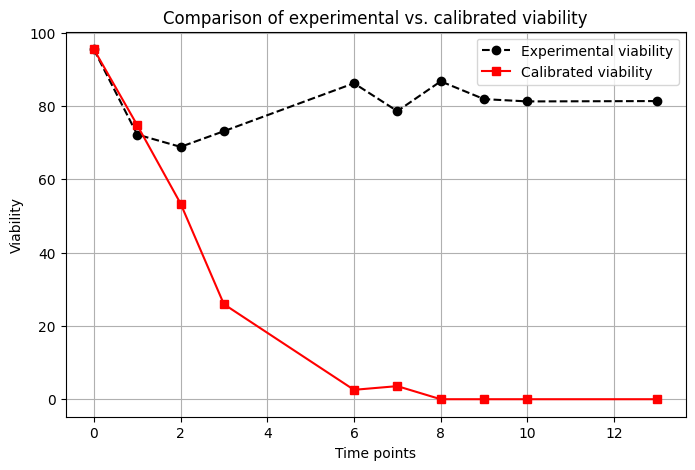

In [11]:
# Convert viability dataframe to numpy (assuming it's in a single column)
viability_calibrated = viability.to_numpy().flatten()

# Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(time_points, viability_exp, label="Experimental viability", color="black", linestyle="--", marker="o")
plt.plot(time_points, viability_calibrated, label="Calibrated viability", color="red", linestyle="-", marker="s")

# Labels and title
plt.xlabel("Time points")
plt.ylabel("Viability")
plt.title("Comparison of experimental vs. calibrated viability")
plt.legend()
plt.grid()

# Show plot
plt.show()

#### Concentration

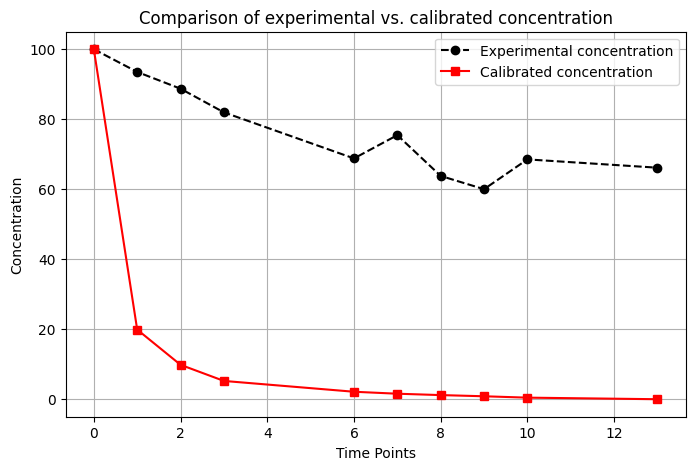

In [12]:
# Convert viability dataframe to numpy (assuming it's in a single column)
concentration_calibrated = concentration.to_numpy().flatten()

# Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(time_points, concentration_exp, label="Experimental concentration", color="black", linestyle="--", marker="o")
plt.plot(time_points, concentration_calibrated, label="Calibrated concentration", color="red", linestyle="-", marker="s")

# Labels and title
plt.xlabel("Time Points")
plt.ylabel("Concentration")
plt.title("Comparison of experimental vs. calibrated concentration")
plt.legend()
plt.grid()

# Show plot
plt.show()